In [99]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [14]:
count = 0
dirs = os.listdir('flower_images/')
for dir in dirs:
    files = list(os.listdir('flower_images/' + dir))
    print(dir + ' folder has ' + str(len(files)) + ' images.')
    count = count + len(files)
print('flower_images folder has ' + str(count) + ' images.')

.ipynb_checkpoints folder has 0 images.
daisy folder has 20 images.
dandelion folder has 29 images.
rose folder has 31 images.
sunflower folder has 47 images.
tulip folder has 54 images.
flower_images folder has 181 images.


### Load images into np arrays

In [21]:
base_dir = 'flower_images/'
img_size = 180
batch = 32

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset='training',
    batch_size=batch,
    image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split=0.2,
    subset='validation',
    batch_size=batch,
    image_size=(img_size,img_size))


Found 181 files belonging to 5 classes.
Using 145 files for training.
Found 181 files belonging to 5 classes.
Using 36 files for validation.


In [29]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [31]:
import matplotlib.pyplot as plt

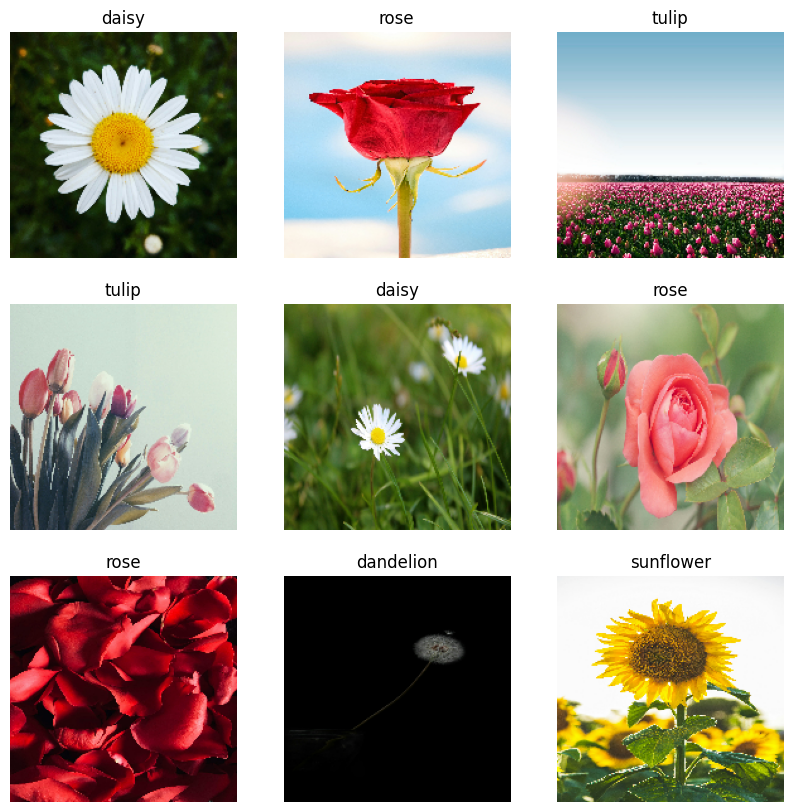

In [55]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [57]:
autotune = tf.data.AUTOTUNE

In [59]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = autotune)

In [61]:
val_ds = val_ds.cache().prefetch(buffer_size = autotune)

### Data AUgmentation

In [77]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

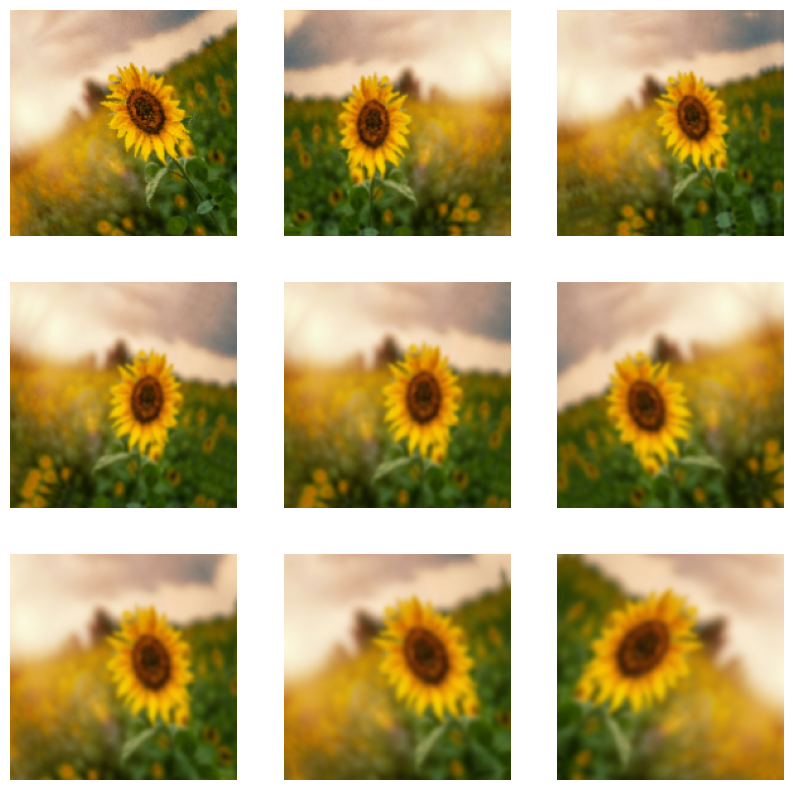

In [95]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

**Model**

In [105]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [111]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2037 - loss: 2.1114 - val_accuracy: 0.4167 - val_loss: 1.4994
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.3378 - loss: 1.5408 - val_accuracy: 0.2222 - val_loss: 1.4968
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.3337 - loss: 1.5039 - val_accuracy: 0.3333 - val_loss: 1.4783
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.4232 - loss: 1.4590 - val_accuracy: 0.6111 - val_loss: 1.2470
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.4629 - loss: 1.3526 - val_accuracy: 0.3889 - val_loss: 1.1891
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.5454 - loss: 1.2373 - val_accuracy: 0.4722 - val_loss: 1.2196
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.5839 - loss: 1.1346 - val_accuracy: 0.5556 - val_loss: 1.0376
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.6664 - loss: 0.9986 - val_accuracy: 0.5556 - val_loss: 0

In [135]:
from PIL import Image
from IPython.display import display


In [149]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The image is a ' + flower_names[np.argmax(result)] + '.'
    return outcome

In [151]:
classify_images("Samples/lale.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


'The image is a tulip.'

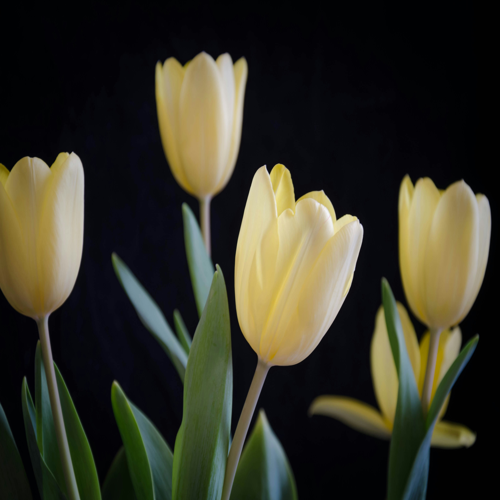

In [161]:
img = Image.open("Samples/lale.jpg")
img_resized = img.resize((500, 500))
display(img_resized)

In [153]:
classify_images("Samples/roza.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


'The image is a rose.'

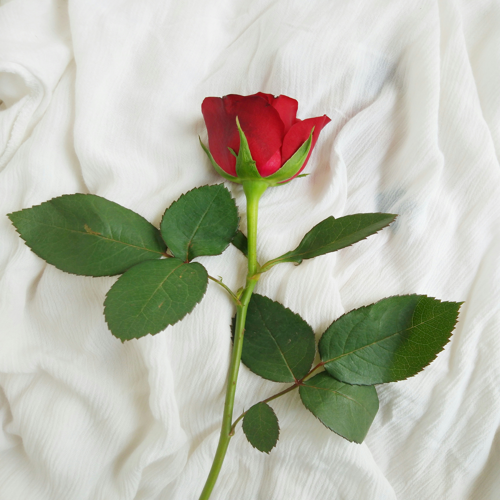

In [163]:
img = Image.open("Samples/roza.jpg")
img_resized = img.resize((500, 500))
display(img_resized)

In [171]:
model.save('Flower_recognition_model.h5')